## k 평균 알고리즘의 이해 

In [7]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환 
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
from  sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0 ]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,0,1,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,0,1,-2.889820,-0.137346


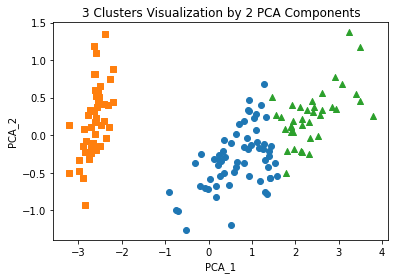

In [6]:
#군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

#군집 값이 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s,^로 마커 표시 
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')


plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성 

In [8]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state= 0)
print(X.shape, y.shape)

#y target 값의 분포를 확인 
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


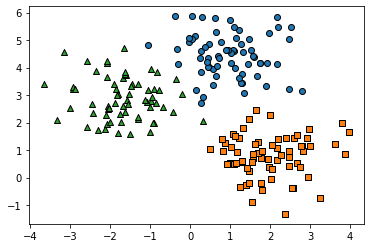

In [10]:
target_list = np.unique(y)
#각 타깃별 산점도의 마커 값 
markers = ['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
#target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])

plt.show()

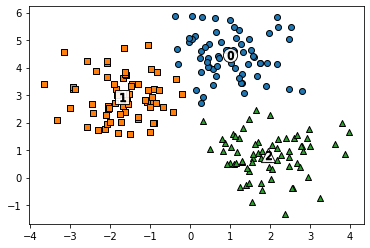

In [15]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters= 3, init= 'k-means++', max_iter = 200, random_state =0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출 
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

#집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker= markers[label])
    
    #군집별 중심 위치 좌표 시각화 
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker= markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker='$%d$' % label)

    
plt.show()

In [17]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## 군집 평가

In [21]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


#실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names= ['sepal_length','sepal_width','petal_length' ,'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가 
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.851573
1,4.9,3.0,1.4,0.2,1,0.817887
2,4.7,3.2,1.3,0.2,1,0.830087


## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [23]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

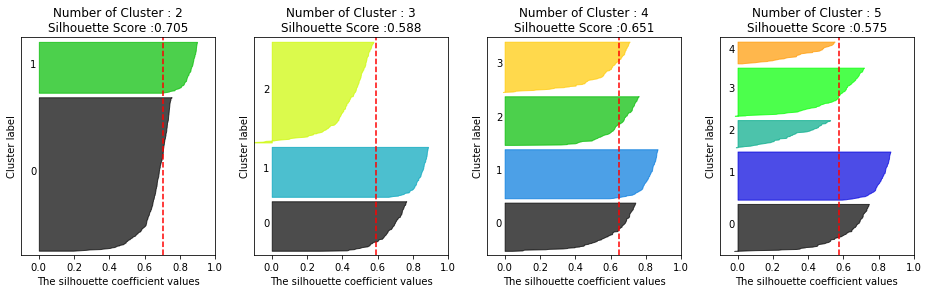

In [26]:
#make_blobs()를 통해 군집화를 위한 4개의 군집 중심의  500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y =make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1, center_box = (-10.0, 10.0), shuffle = True, random_state = 1)

#군집 개수가 2,3,4,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

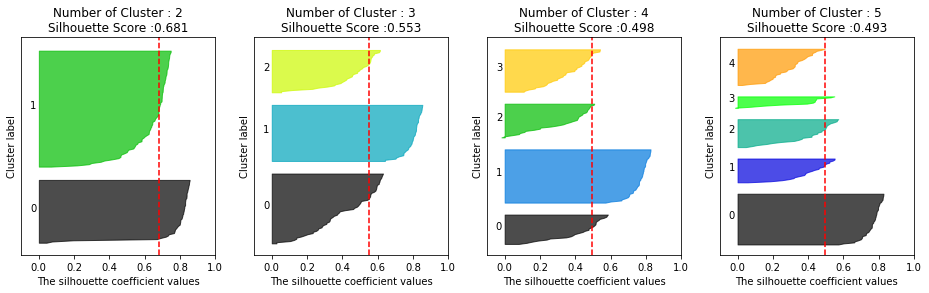

In [27]:
iris= load_iris()
visualize_silhouette([2,3,4,5], iris.data)

## 평균 이동

In [29]:
from sklearn.cluster import MeanShift

X, y= make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('Cluster Labels  유형 : ', np.unique(cluster_labels))

Cluster Labels  유형 :  [0 1 2 3 4 5]


In [30]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('Cluster Labels  유형 : ', np.unique(cluster_labels))

Cluster Labels  유형 :  [0 1 2]


In [31]:
from sklearn.cluster  import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 :', round(bandwidth, 3))

bandwidth 값 : 1.816


In [32]:
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형', np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


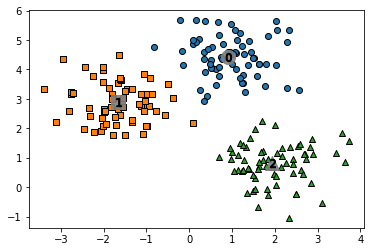

In [34]:
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    
    #군집별로 다른 마커도 산점도 적용 
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    
    #군집별 중심 표현
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'gray', alpha = 0.9, marker= markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker='$%d$' % label)
    
plt.show()

In [36]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width','petal_length','petal_width']

#좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data ,columns = feature_names)
irisDF['target'] = iris.target

In [37]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 3, random_state= 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster'칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

#target값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [38]:
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter = 300, random_state = 0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


In [40]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

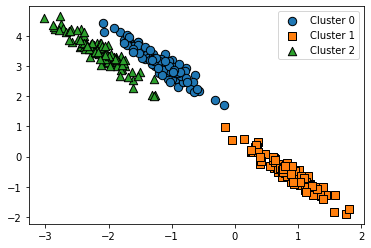

In [41]:
from sklearn.datasets import make_blobs

#make_blobs()로 300개의 데이터 세트, 3개의 군집세트 , cluster_std = 0.5를 만듦
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.5, random_state =0)

#길게 늘어난 타원형의 데이터를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장 
clusterDF = pd.DataFrame(data = X_aniso, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
#생성된 데이터 세트를  target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

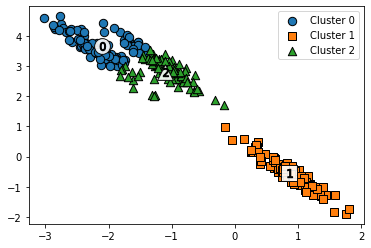

In [42]:
#3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용 
kmeans = KMeans(3, random_state = 0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter = True)

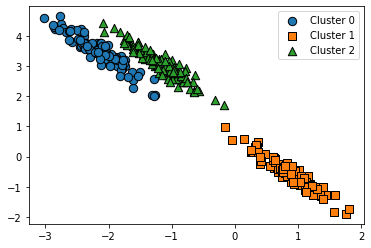

In [43]:
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용 
gmm = GaussianMixture(n_components =3, random_state = 0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter = False)

In [44]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


## DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


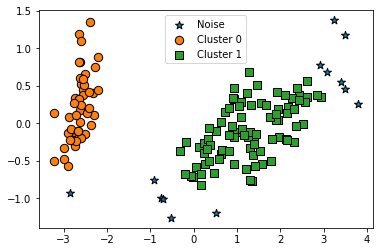

In [47]:
from sklearn.decomposition import PCA

#2차원으로 시각화하기 위해 PCA n_components =2로 피처 데이터 세트 변환 
pca = PCA(n_components = 2, random_state =0)
pca_transformed = pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


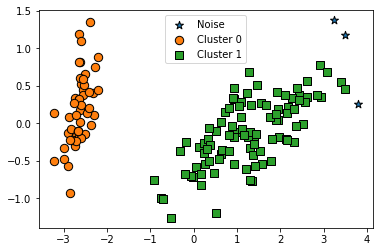

In [49]:
dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


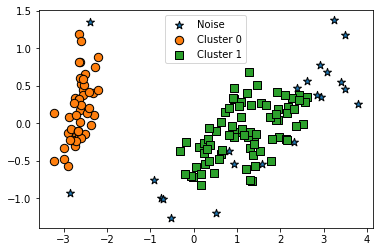

In [51]:
dbscan = DBSCAN(eps = 0.6, min_samples = 16, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## make_circles()

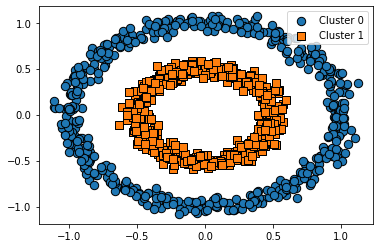

In [52]:
from sklearn.datasets import make_circles

X, y= make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target',iscenter = False)

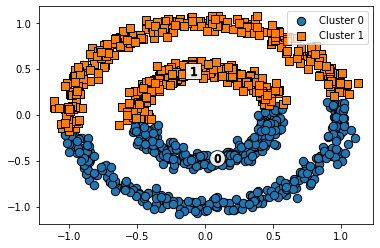

In [53]:
#KMeans로 make_circle() 데이터 세트 군집화 수행 

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter = True)

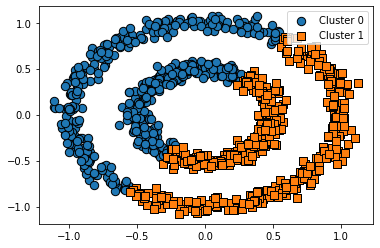

In [58]:
gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm_labels = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter = False)

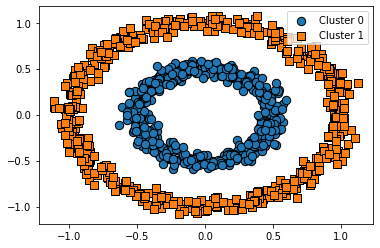

In [59]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan,clusterDF, 'dbscan_cluster', iscenter=False)